In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point


plt.style.use('ggplot')
import pyreadr
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [190]:
traindf = pd.read_csv('dataset/train.csv')
testdf = pd.read_csv('dataset/test.csv')

In [191]:
traindf.head(2)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0

In [192]:
testdf.head(2)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [129]:
traindf.shape

testdf.shape

(116293, 11)

In [130]:
traindf.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [131]:
testdf.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [193]:
traindf.duplicated().sum()

813

In [194]:
traindf.drop_duplicates(inplace=True)

In [195]:
testdf.duplicated().sum()

0

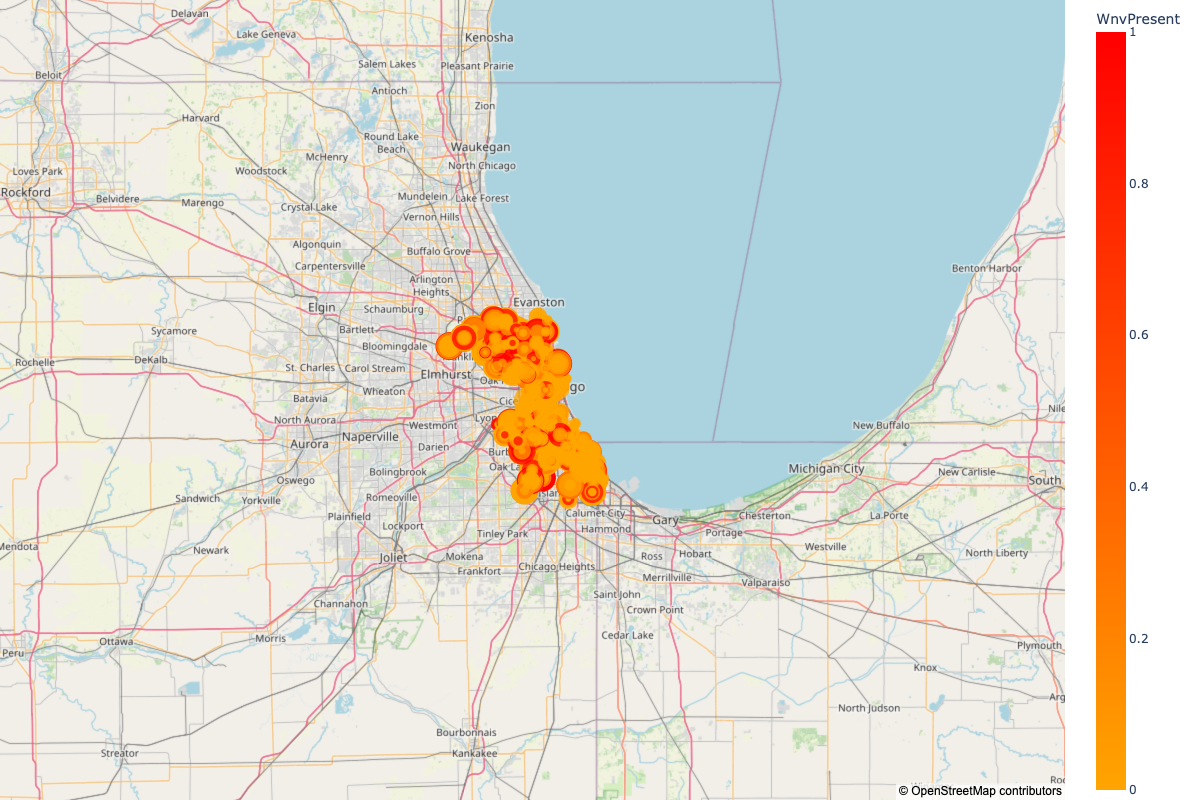

In [135]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(traindf, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Species", 
                        hover_data=["Species", "Date"],
                        color="WnvPresent",
                        color_continuous_scale=color_scale,
                        size="NumMosquitos",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [136]:
traindf.columns.unique

<bound method Index.unique of Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')>

Text(0, 0.5, 'WnvPresent')

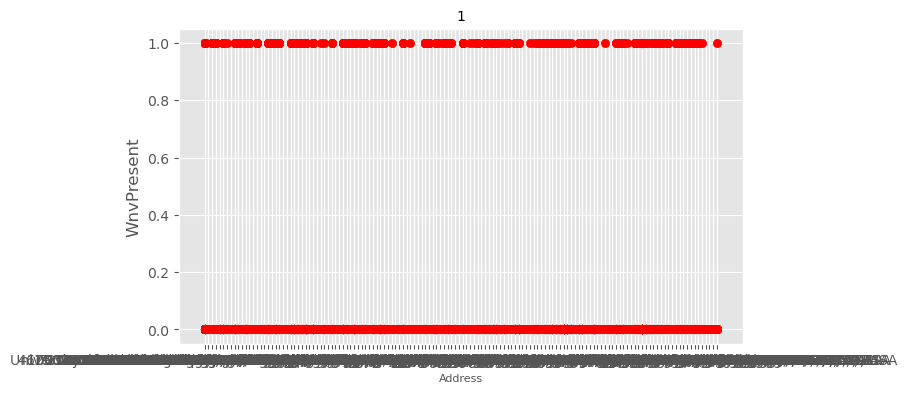

In [137]:
plt.figure(figsize = (16,9))
ax1 = plt.subplot(2, 2, 1)
ax1.scatter(traindf['Address'],
           traindf['WnvPresent'], color='red')
ax1.set_title('1', fontsize=10)
ax1.set_xlabel('Address', fontsize=8)
ax1.set_ylabel('WnvPresent')

In [138]:
traindf.groupby('WnvPresent')['NumMosquitos'].sum().sort_values(ascending=False)

WnvPresent
0    86823
1    12148
Name: NumMosquitos, dtype: int64

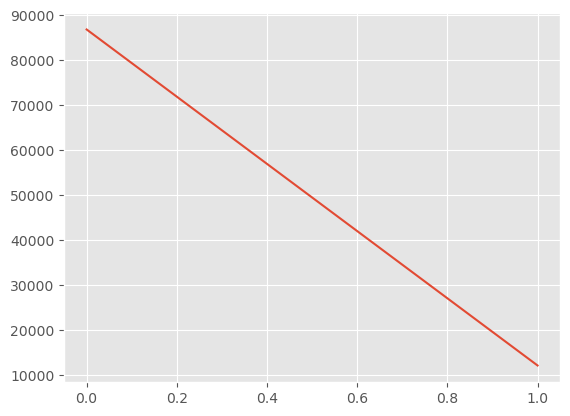

In [139]:
plt.plot(traindf.groupby('WnvPresent')['NumMosquitos'].sum().sort_values(ascending=True))

In [140]:
traindf.groupby('WnvPresent')['NumMosquitos'].sum()

WnvPresent
0    86823
1    12148
Name: NumMosquitos, dtype: int64

In [141]:
traindf.groupby('WnvPresent')['NumMosquitos'].mean()

WnvPresent
0     9.447552
1    24.151093
Name: NumMosquitos, dtype: float64

In [142]:
traindf.groupby('WnvPresent')['NumMosquitos'].median()

WnvPresent
0     4.0
1    21.0
Name: NumMosquitos, dtype: float64

In [143]:
traindf.groupby( 'WnvPresent')['Address'].unique().array

<PandasArray>
[array(['4100 North Oak Park Avenue, Chicago, IL 60634, USA',
       '6200 North Mandell Avenue, Chicago, IL 60646, USA',
       '7900 West Foster Avenue, Chicago, IL 60656, USA',
       '1500 West Webster Avenue, Chicago, IL 60614, USA',
       '2500 West Grand Avenue, Chicago, IL 60654, USA',
       '1100 Roosevelt Road, Chicago, IL 60608, USA',
       '1100 West Chicago Avenue, Chicago, IL 60642, USA',
       '2100 North Stave Street, Chicago, IL 60647, USA',
       '2200 North Cannon Drive, Chicago, IL 60614, USA',
       '2200 West 113th Street, Chicago, IL 60643, USA',
       '1100 South Peoria Street, Chicago, IL 60608, USA',
       '1700 West 95th Street, Chicago, IL 60643, USA',
       '2200 West 89th Street, Chicago, IL 60643, USA',
       'North Streeter Drive, Chicago, IL 60611, USA',
       '6500 North Oak Park Avenue, Chicago, IL 60631, USA',
       '7500 North Oakley Avenue, Chicago, IL 60645, USA',
       '1500 North Long Avenue, Chicago, IL 60651, USA',
 

In [144]:
traindf[traindf['WnvPresent'] == True]['Address'].unique()

array(['3800 East 115th Street, Chicago, IL 60617, USA',
       'South Doty Avenue, Chicago, IL, USA',
       '4100 North Oak Park Avenue, Chicago, IL 60634, USA',
       '7900 West Foster Avenue, Chicago, IL 60656, USA',
       '2200 West 113th Street, Chicago, IL 60643, USA',
       '2200 West 89th Street, Chicago, IL 60643, USA',
       'University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA',
       '4200 West 127th Street, Alsip, IL 60803, USA',
       '4500 North Campbell Avenue, Chicago, IL 60625, USA',
       '7000 North Moselle Avenue, Chicago, IL 60646, USA',
       '3300 North Rutherford Avenue, Chicago, IL 60634, USA',
       'Chicago Midway International Airport (MDW), 5200 West 63rd Street, Chicago, IL 60638, USA',
       '4000 South Dearborn Street, Chicago, IL 60609, USA',
       '5000 South Union Avenue, Chicago, IL 60609, USA',
       'South Stony Island Avenue, Chicago, IL, USA',
       'South Avenue L, Chicago, IL 60617, USA',
       '3

In [145]:
 traindf[traindf['WnvPresent'] == True]['Address'].unique()

array(['3800 East 115th Street, Chicago, IL 60617, USA',
       'South Doty Avenue, Chicago, IL, USA',
       '4100 North Oak Park Avenue, Chicago, IL 60634, USA',
       '7900 West Foster Avenue, Chicago, IL 60656, USA',
       '2200 West 113th Street, Chicago, IL 60643, USA',
       '2200 West 89th Street, Chicago, IL 60643, USA',
       'University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA',
       '4200 West 127th Street, Alsip, IL 60803, USA',
       '4500 North Campbell Avenue, Chicago, IL 60625, USA',
       '7000 North Moselle Avenue, Chicago, IL 60646, USA',
       '3300 North Rutherford Avenue, Chicago, IL 60634, USA',
       'Chicago Midway International Airport (MDW), 5200 West 63rd Street, Chicago, IL 60638, USA',
       '4000 South Dearborn Street, Chicago, IL 60609, USA',
       '5000 South Union Avenue, Chicago, IL 60609, USA',
       'South Stony Island Avenue, Chicago, IL, USA',
       'South Avenue L, Chicago, IL 60617, USA',
       '3

In [146]:
traindf[traindf['WnvPresent'] == False]['Address'].unique()

array(['4100 North Oak Park Avenue, Chicago, IL 60634, USA',
       '6200 North Mandell Avenue, Chicago, IL 60646, USA',
       '7900 West Foster Avenue, Chicago, IL 60656, USA',
       '1500 West Webster Avenue, Chicago, IL 60614, USA',
       '2500 West Grand Avenue, Chicago, IL 60654, USA',
       '1100 Roosevelt Road, Chicago, IL 60608, USA',
       '1100 West Chicago Avenue, Chicago, IL 60642, USA',
       '2100 North Stave Street, Chicago, IL 60647, USA',
       '2200 North Cannon Drive, Chicago, IL 60614, USA',
       '2200 West 113th Street, Chicago, IL 60643, USA',
       '1100 South Peoria Street, Chicago, IL 60608, USA',
       '1700 West 95th Street, Chicago, IL 60643, USA',
       '2200 West 89th Street, Chicago, IL 60643, USA',
       'North Streeter Drive, Chicago, IL 60611, USA',
       '6500 North Oak Park Avenue, Chicago, IL 60631, USA',
       '7500 North Oakley Avenue, Chicago, IL 60645, USA',
       '1500 North Long Avenue, Chicago, IL 60651, USA',
       '8900 Sou

In [147]:
weatherdf = pd.read_csv('dataset/weather.csv')

In [148]:
weatherdf.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [149]:
weatherdf.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

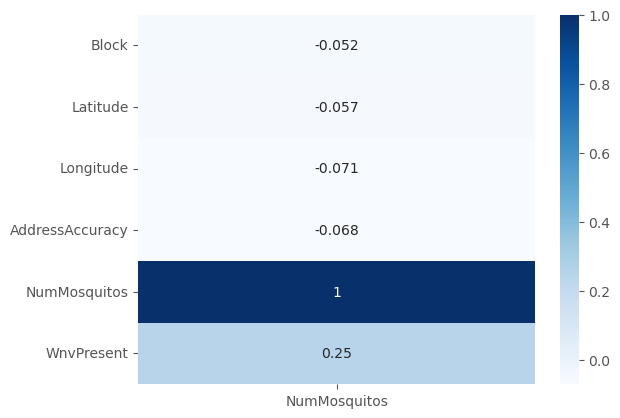

In [150]:
sns.heatmap(traindf.corr(numeric_only=True)[['NumMosquitos']], annot=True, cmap='Blues');

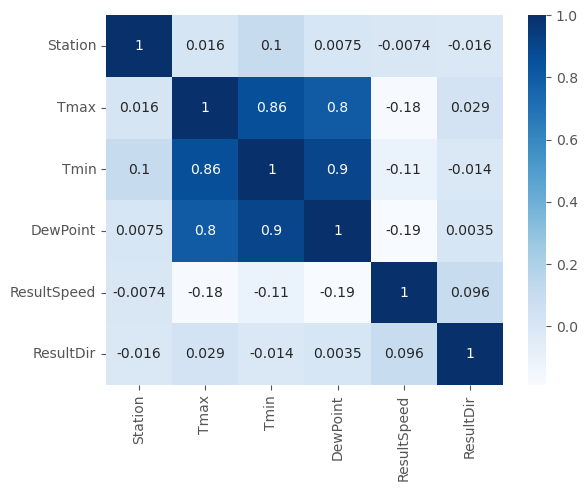

In [151]:
sns.heatmap(weatherdf.corr(numeric_only=True), annot=True, cmap='Blues');

In [152]:
weatherdf.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [153]:
weatherdf.head(20)

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0         1  2007-05-01    83    50   67     14        51      56    0    2   
1         2  2007-05-01    84    52   68      M        51      57    0    3   
2         1  2007-05-02    59    42   51     -3        42      47   14    0   
3         2  2007-05-02    60    43   52      M        42      47   13    0   
4         1  2007-05-03    66    46   56      2        40      48    9    0   
5         2  2007-05-03    67    48   58      M        40      50    7    0   
6         1  2007-05-04    66    49   58      4        41      50    7    0   
7         2  2007-05-04    78    51    M      M        42      50    M    M   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
9         2  2007-05-05    66    54   60      M        39      50    5    0   
10        1  2007-05-06    68    49   59      4        30      46    6    0   
11        2  2007-05-06    68    52   60      M        30      46    5    0   
12        1  2007-05-07    83    47   65     10        41      54    0    0   
13        2  2007-05-07    84    50   67      M        39      53    0    2   
14        1  2007-05-08    82    54   68     12        58      62    0    3   
15        2  2007-05-08    80    60   70      M        57      63    0    5   
16        1  2007-05-09    77    61   69     13        59      63    0    4   
17        2  2007-05-09    76    63   70      M        60      63    0    5   
18        1  2007-05-10    84    56   70     14        52      60    0    5   
19        2  2007-05-10    83    59   71      M        52      61    0    6   

    ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0   ...             0      M      0.0        0.00       29.10    29.82   
1   ...             M      M        M        0.00       29.18    29.82   
2   ...      BR     0      M      0.0        0.00       29.38    30.09   
3   ...   BR HZ     M      M        M        0.00       29.44    30.08   
4   ...             0      M      0.0        0.00       29.39    30.12   
5   ...      HZ     M      M        M        0.00       29.46    30.12   
6   ...      RA     0      M      0.0           T       29.31    30.05   
7   ...             M      M        M        0.00       29.36    30.04   
8   ...             0      M      0.0           T       29.40    30.10   
9   ...             M      M        M           T       29.46    30.09   
10  ...             0      M      0.0        0.00       29.57    30.29   
11  ...             M      M        M        0.00       29.62    30.28   
12  ...      RA     0      M      0.0           T       29.38    30.12   
13  ...             M      M        M        0.00       29.44    30.12   
14  ...      BR     0      M      0.0        0.00       29.29    30.03   
15  ...      HZ     M      M        M           T       29.36    30.02   
16  ...   BR HZ     0      M      0.0        0.13       29.21    29.94   
17  ...   BR HZ     M      M        M        0.02       29.28    29.93   
18  ...      BR     0      M      0.0        0.00       29.20    29.92   
19  ...   BR HZ     M      M        M        0.00       29.26    29.91   

   ResultSpeed ResultDir  AvgSpeed  
0          1.7        27       9.2  
1          2.7        25       9.6  
2         13.0         4      13.4  
3         13.3         2      13.4  
4         11.7         7      11.9  
5         12.9         6      13.2  
6         10.4         8      10.8  
7         10.1         7      10.4  
8         11.7         7      12.0  
9         11.2         7      11.5  
10        14.4        11      15.0  
11        13.8        10      14.5  
12         8.6        18      10.5  
13         8.5        17       9.9  
14         2.7        11       5.8  
15         2.5         8       5.4  
16         3.9         9       6.2  
17         3.9         7       5.9  
18         0.7        17       4.1  
19         2.0         9       3.9  

[20 rows x 

In [154]:
weatherdf['Tavg'].unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

In [155]:
dtype(weatherdf['Tavg'])

NameError: name 'dtype' is not defined

In [156]:
weatherdf.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [157]:
weatherdf.PrecipTotal.unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [158]:
weatherdf.PrecipTotal.value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
3.64       1
4.73       1
1.60       1
2.24       1
1.18       1
Name: PrecipTotal, Length: 168, dtype: int64

In [159]:
weatherdf.StnPressure.value_counts()

29.34    128
29.28    124
29.26    123
29.21    107
29.31    106
        ... 
28.88      1
28.59      1
28.67      1
28.75      1
28.83      1
Name: StnPressure, Length: 104, dtype: int64

In [160]:
weatherdf.StnPressure.unique()

array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.36', '29.40', '29.57', '29.62', '29.29', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', 'M', '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [161]:
weatherdf.ResultSpeed.unique()

array([ 1.7,  2.7, 13. , 13.3, 11.7, 12.9, 10.4, 10.1, 11.2, 14.4, 13.8,
        8.6,  8.5,  2.5,  3.9,  0.7,  2. , 11.3, 12.4, 12.7,  6.6,  6.4,
       16.9, 14.1,  8.1,  7.8,  8. , 10.5,  5.4,  3.4, 11.1,  6.3, 10. ,
       11.4, 10.9, 14.9,  4.9,  4.5,  2.8,  8.9,  8.2,  4.8,  4.7,  5.8,
       10.3,  9.7,  9.3,  4.2,  6.5,  7.5,  5.2,  7.9,  6.2, 10.8,  9.6,
       22.7, 20.3,  0.3,  2.4,  4.6,  8.3,  9.4,  7.2,  7. ,  5.6,  5.9,
        4.1,  3.8,  2.1,  4. , 14. , 12.2, 10.7,  3.5,  3.7,  7.6,  7.3,
        6.1, 11.9,  7.4,  5.1,  9.5,  6.7,  3.1,  4.3,  3.2,  3.3,  8.4,
       12.6,  8.8,  9.1,  1.4,  1.2,  4.4,  7.7,  1.9,  2.9,  1.1,  3. ,
       10.6,  5.5,  5.7,  1.6,  2.6,  1.5,  6.9,  3.6,  6. ,  0.5,  5.3,
        9. ,  2.2, 12.8,  9.2, 12.1,  1.8,  7.1,  6.8, 12.5,  5. ,  9.8,
        2.3, 11.5, 15.1, 14.6, 17.2, 15.5, 16.2, 17.7, 18. , 16.7, 16. ,
       13.9, 14.5, 10.2, 14.3, 13.7, 19.2, 13.2, 21.1, 11.8, 16.1, 14.8,
        8.7, 11.6, 13.6,  1. , 12. , 17.5, 13.4,  9

In [162]:
weatherdf.AvgSpeed.value_counts()

6.9     63
5.8     60
7.4     55
8.1     49
7.0     47
        ..
16.2     1
21.5     1
20.2     1
18.4     1
22.6     1
Name: AvgSpeed, Length: 178, dtype: int64

In [163]:
weatherdf.AvgSpeed.unique()

array(['9.2', '9.6', '13.4', '11.9', '13.2', '10.8', '10.4', '12.0',
       '11.5', '15.0', '14.5', '10.5', '9.9', '5.8', '5.4', '6.2', '5.9',
       '4.1', '3.9', '12.9', '12.8', '13.0', '8.1', '7.6', '17.3', '14.6',
       '12.3', '12.2', '11.8', '11.3', '7.5', '5.5', '11.4', '10.7',
       '9.7', '8.2', '7.8', '10.2', '10.6', '11.2', '15.2', '8.8', '7.2',
       '9.5', '5.3', '5.2', '6.5', '7.4', '10.1', '6.4', '6.7', '23.1',
       '20.7', '13.8', '12.4', '5.0', '4.7', '5.6', '6.9', '8.4', '10.0',
       '8.6', 'M', '6.8', '4.9', '6.1', '6.3', '15.1', '12.6', '7.7',
       '8.7', '9.0', '8.0', '6.0', '7.1', '8.5', '12.5', '13.3', '8.3',
       '7.3', '13.1', '12.7', '10.9', '11.1', '13.9', '6.6', '14.4',
       '9.1', '3.3', '3.5', '4.0', '7.0', '9.4', '7.9', '5.7', '4.3',
       '4.6', '3.7', '11.7', '4.4', '12.1', '13.5', '13.7', '11.0', '9.8',
       '8.9', '10.3', '15.5', '18.9', '17.2', '16.7', '18.0', '18.2',
       '16.8', '14.1', '14.7', '4.2', '9.3', '14.3', '17.7', '17.8'

In [164]:
traindf.Trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [165]:
traindf.Trap.value_counts()

T900     612
T115     212
T138     181
T135     172
T002     168
        ... 
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [166]:
testdf.Trap.value_counts()

T009     1528
T035     1520
T900     1468
T002      857
T008      822
         ... 
T219      760
T161      760
T088      760
T085      760
T054C     760
Name: Trap, Length: 149, dtype: int64

In [167]:
traindf[traindf['Trap'] == 'T900']['WnvPresent'].value_counts()

0    557
1     55
Name: WnvPresent, dtype: int64

In [168]:
traindf[traindf['Trap'] == 'T009']['WnvPresent'].value_counts()

0    99
1     9
Name: WnvPresent, dtype: int64

In [169]:
traindf[traindf['Trap'] == 'T035']['WnvPresent'].value_counts()

0    69
1     3
Name: WnvPresent, dtype: int64

In [170]:
traindf[traindf['Trap'] == 'T115']['WnvPresent'].value_counts()

0    192
1     20
Name: WnvPresent, dtype: int64

In [171]:
traindf[traindf['Trap'] == 'T138']['WnvPresent'].value_counts()

0    172
1      9
Name: WnvPresent, dtype: int64

In [172]:
traindf[traindf['Trap'] == 'T135']['WnvPresent'].value_counts()

0    164
1      8
Name: WnvPresent, dtype: int64

In [173]:
traindf[traindf['Trap'] == 'T002']['WnvPresent'].value_counts()

0    150
1     18
Name: WnvPresent, dtype: int64

In [174]:
traindf[traindf['Trap'] == 'T008']['WnvPresent'].value_counts()

0    125
1     10
Name: WnvPresent, dtype: int64

In [175]:
traindf[traindf['Species'] == 'CULEX PIPIENS/RESTUANS']['WnvPresent'].value_counts()

0    4223
1     246
Name: WnvPresent, dtype: int64

In [176]:
traindf[traindf['Species'] == 'CULEX RESTUANS']['WnvPresent'].value_counts()

0    2623
1      49
Name: WnvPresent, dtype: int64

In [177]:
traindf[traindf['Species'] == 'CULEX PIPIENS']['WnvPresent'].value_counts()

0    2031
1     208
Name: WnvPresent, dtype: int64

In [178]:
traindf[traindf['Species'] == 'CULEX TERRITANS']['WnvPresent'].value_counts()

0    221
Name: WnvPresent, dtype: int64

In [179]:
traindf[traindf['Species'] == 'CULEX SALINARIUS']['WnvPresent'].value_counts()

0    85
Name: WnvPresent, dtype: int64

In [180]:
traindf[traindf['Species'] == 'CULEX TARSALIS']['WnvPresent'].value_counts()

0    6
Name: WnvPresent, dtype: int64

In [181]:
traindf[traindf['Species'] == 'CULEX ERRATICUS']['WnvPresent'].value_counts()

0    1
Name: WnvPresent, dtype: int64

In [182]:
traindf[traindf['AddressAccuracy'] == 3]['WnvPresent'].value_counts()

0    88
1     1
Name: WnvPresent, dtype: int64

In [183]:
traindf[traindf['AddressAccuracy'] == 5]['WnvPresent'].value_counts()

0    1238
1      64
Name: WnvPresent, dtype: int64

In [184]:
traindf[traindf['AddressAccuracy'] == 8]['WnvPresent'].value_counts()

0    4287
1     235
Name: WnvPresent, dtype: int64

In [185]:
traindf[traindf['AddressAccuracy'] == 9]['WnvPresent'].value_counts()

0    3577
1     203
Name: WnvPresent, dtype: int64

In [189]:
traindf['Date'] = pd.to_datetime(traindf['Date'])
traindf.set_index('Date',inplace=True)

weatherdf['Date'] = pd.to_datetime(weatherdf['Date'])
weatherdf.set_index('Date', inplace=True)

#merging train and weather data.
train = traindf.join(weatherdf, how='left')
train.replace('M',np.Nan,inplace=True)
train.replace('-',np.Nan,inplace=True)
train.replace('  T', 1,inplace=True)

train.head()

KeyError: 'Date'

In [ ]:
X = df['message'] #Define X as text
y = df['Class']